### Use SQL and Python, answer below questions:

1. Plot the distribution of the number of orders made by each customer in the whole dataset.
2. What are customers' favorite departments and Aisles
3. What is the best selling Aisles in each department based on number of orders
4. Draw a pie chart for the number of orders in each departments

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [21]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [22]:
print(aisles.shape)
print(departments.shape)
print(order_products.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(33819106, 3)
(3421083, 6)
(49688, 4)


In [23]:
aisles_products = pd.merge(aisles, products, on = "aisle_id")

In [24]:
ord_prod_ord = pd.merge(order_products, orders, on = "order_id")

In [25]:
ais_prod_depart = pd.merge(aisles_products, departments, on="department_id")

In [26]:
new = pd.merge(ais_prod_depart, ord_prod_ord, on = "product_id")
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   aisle_id                int64  
 1   aisle                   object 
 2   product_id              int64  
 3   product_name            object 
 4   department_id           int64  
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   user_id                 int64  
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
dtypes: float64(1), int64(9), object(3)
memory usage: 3.5+ GB


In [27]:
new.head()

,aisle_id,aisle,product_id,product_name,department_id,department,order_id,add_to_cart_order,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,prepared soups salads,209,Italian Pasta Salad,20,deli,94246,5,114082,26,0,20,1.0
1,1,prepared soups salads,209,Italian Pasta Salad,20,deli,192465,2,119977,2,0,16,3.0
2,1,prepared soups salads,209,Italian Pasta Salad,20,deli,195206,18,1519,7,2,9,5.0
3,1,prepared soups salads,209,Italian Pasta Salad,20,deli,227717,1,161125,7,2,11,11.0
4,1,prepared soups salads,209,Italian Pasta Salad,20,deli,260072,13,12012,5,5,11,11.0


In [28]:
new.shape

(33819106, 13)

1. Plot the distribution of the number of orders made by each customer in the whole dataset.

visualization: 直接group by 一个column，value_counts(), 目的是做visualization

In [ ]:
distribution 用正态分布图，or heatmap, or histogram

In [22]:
new['user_id'].value_counts('order_id')  #Bar Chart, Pie Chart, heatmap, Histogram

201268    1.101448e-04
129928    1.090804e-04
164055    9.133890e-05
176478    8.728794e-05
186704    8.681483e-05
              ...     
159016    8.870725e-08
191768    8.870725e-08
196       8.870725e-08
144555    8.870725e-08
112788    8.870725e-08
Name: user_id, Length: 206209, dtype: float64

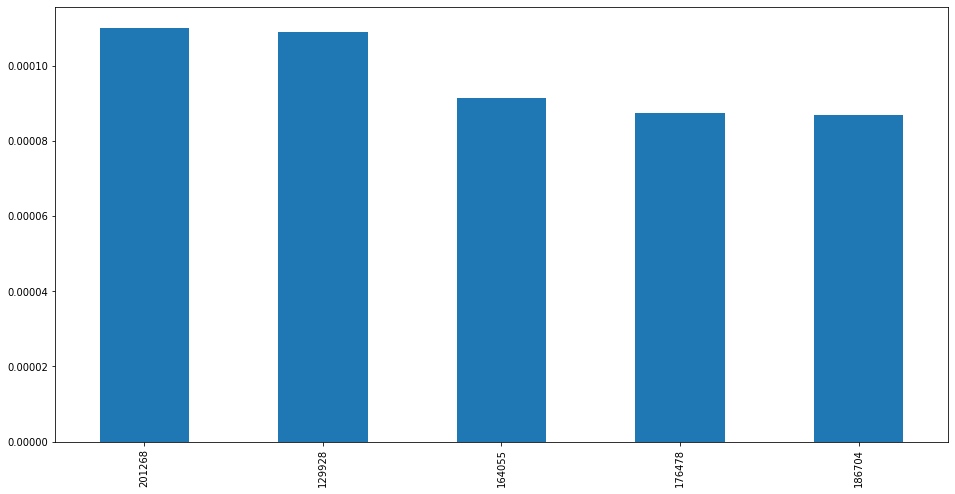

In [23]:
plt.figure(figsize=(16,8))
new['user_id'].value_counts('order_id').head().plot.bar()
plt.show()

In [ ]:
#another way    df.groupby().size,       df.groupby.count()
#groupby user_id. count() 多少 order
df = new.groupby('user_id').size()  

In [ ]:
如果用的是orders table, orders.groupby(user_id).count()

data transformation, investigation 用df.groupby.size(),  df.groupby.count()

2. What are customers' favorite departments and Aisles

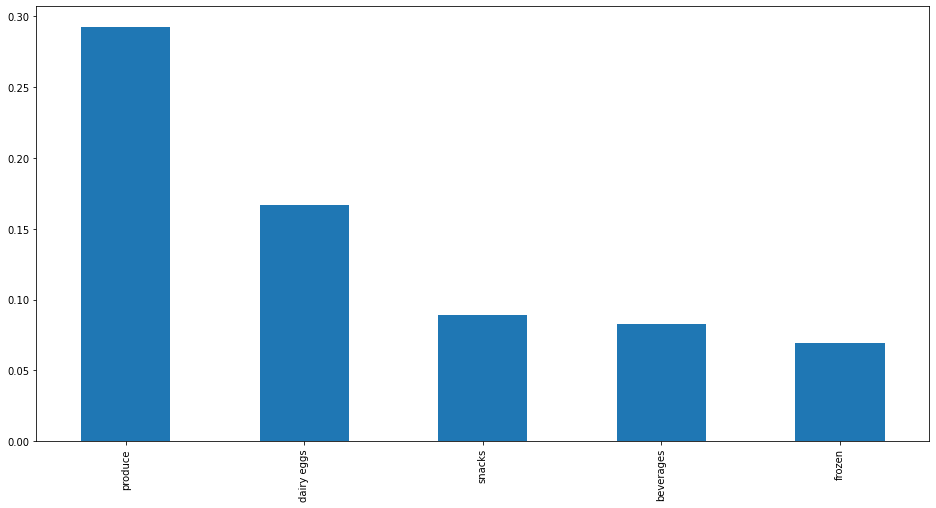

In [26]:
plt.figure(figsize=(16,8))
new['department'].value_counts('order_id').head(5).plot.bar()
plt.show()

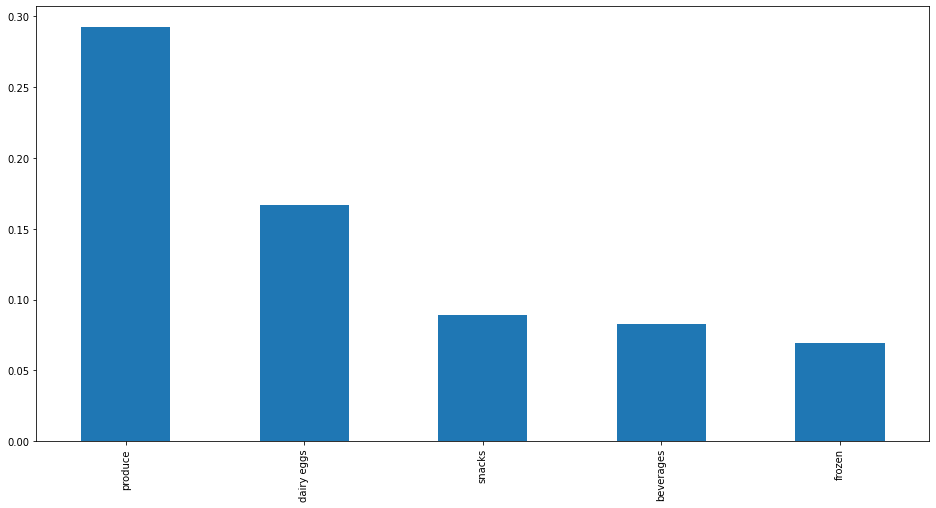

In [27]:
plt.figure(figsize=(16,8))
new['department'].value_counts('order_id').head(5).plot.bar()
plt.show()

Department produce whose department_id is 4 is customers' favorate department. 

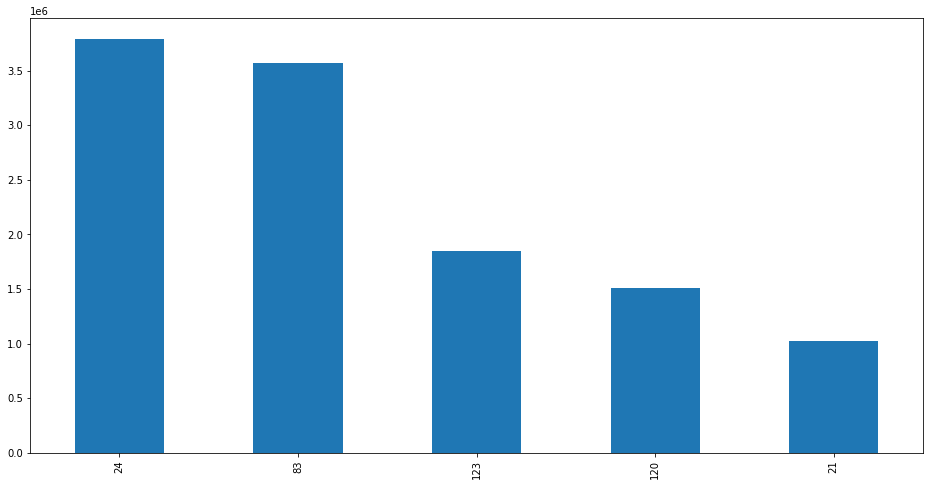

In [20]:
plt.figure(figsize=(16,8))
new['aisle_id'].value_counts().head(5).plot.bar()
plt.show()

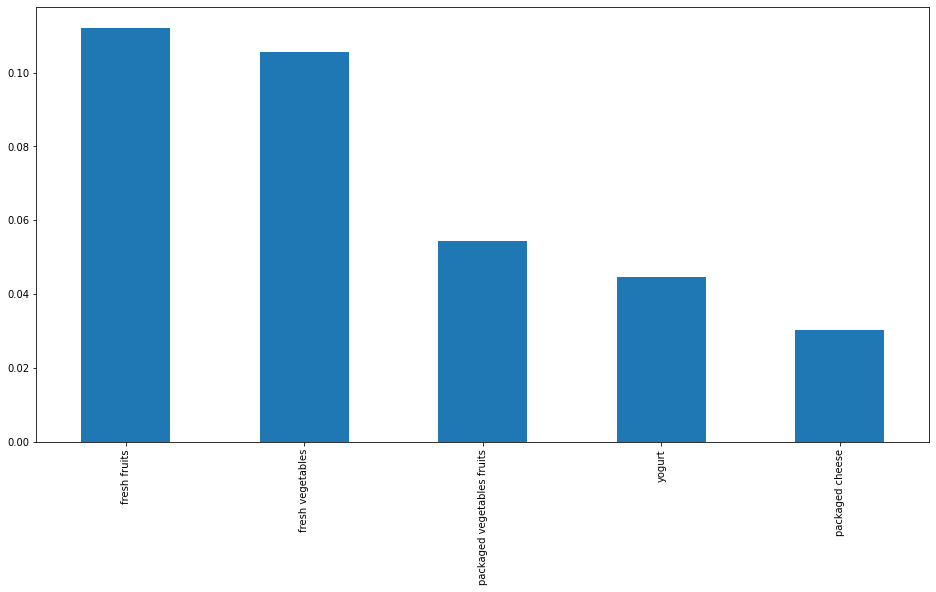

In [28]:
plt.figure(figsize=(16,8))
new['aisle'].value_counts('order_id').head(5).plot.bar()
plt.show()

fresh fruits whose aisle_id is 24 is customers' favorite aisle. 

3. What is the best selling Aisles in each department based on number of orders

In [72]:
new.groupby(['department_id','aisle_id'])['aisle_id'].value_counts('order_id')

department_id  aisle_id  aisle_id
1              34        34          1.0
               37        37          1.0
               38        38          1.0
               42        42          1.0
               52        52          1.0
                                    ... 
20             13        13          1.0
               14        14          1.0
               67        67          1.0
               96        96          1.0
21             100       100         1.0
Name: aisle_id, Length: 134, dtype: float64

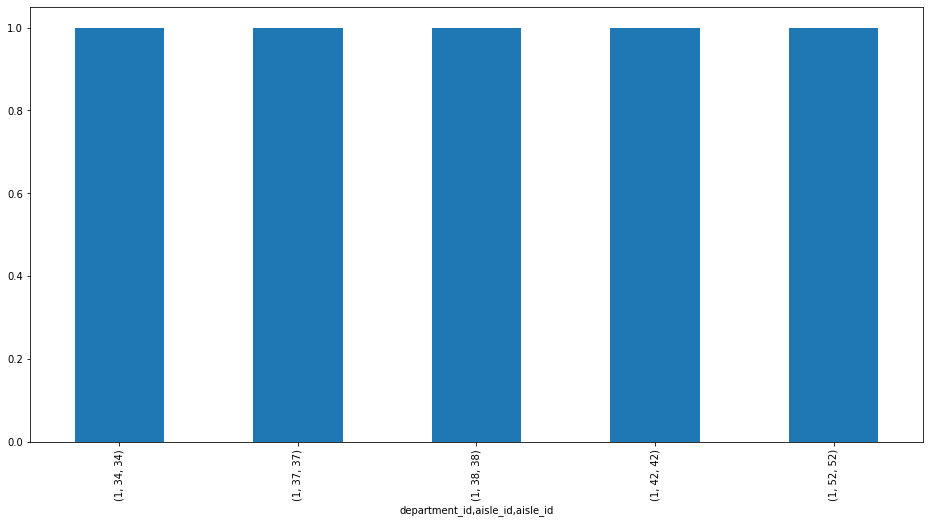

In [74]:
#value_counts()
#group by department_id, aisle_id
plt.figure(figsize=(16,8))
new.groupby(['department_id','aisle_id'])['aisle_id'].value_counts('order_id').head(5).plot.bar()
plt.show()

aisle_id is 34.

4. Draw a pie chart for the number of orders in each departments

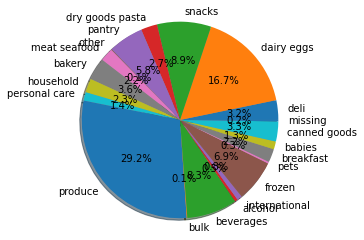

In [29]:
# Syntax: matplotlib.pyplot.pie(data, explode=None, 
#         labels=None, colors=None, autopct=None, shadow=False)
labels = new['department'].unique().tolist()
counts = new['department'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True) 
ax1.axis('equal')
plt.show()